In this project, we, Tech Rays want to show our project. We use garments dataset.

This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

### Objectives

This project is created to predict whether the actual productivity meets the productivity that already targeted with the variables provided by management.

The other objective is also to find data discrepancies and show them to management what variables need to be reviewed.

### Importing Dataset

First, we need to import the dataset. We can find the dataset from [Kaggle](https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees?resource=download).

Then let's `import` libraries used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

Now, let's just read the csv data with `pd.red_csv()` from pandas library and check the info wih `.info()` to check whether there are missing information and also to check the data types.

In [2]:
garments = pd.read_csv('https://raw.githubusercontent.com/johannaritonang/garment_employee_productivity/main/garments_worker_productivity.csv')

Let's check whether the dataset has duplication or not.

In [3]:
garments.duplicated().sum()

0

There is no duplication in this data, which is good.
Now, let's check the data shape.

In [4]:
garments.shape

(1197, 15)

This dataset consists of **15 columnns** and **1,197 rows**. It's time to check the info of our data.

In [5]:
garments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

As we can see, the type of `date`, `quarter`, `department` and `day` columns are **object**. `date` column should be `datetime64[ns]`.

### Data Description

Garments consist of 1197 rows of data with 15 columns which contains of these informations as follow:

`date` : Date in MM-DD-YYYY.

`quarter` : A portion of the month. A month was divided into four quarters.

`department` : Associated department with the instance.

`day` : Day of the Week.

`team` : Associated team number with the instance.

`targeted_productivity` : Targeted productivity set by the Authority for each team for each day.

`smv` : Standard Minute Value, it is the allocated time for a task.

`wip` : Work in progress. Includes the number of unfinished items for products.

`over_time` : Represents the amount of overtime by each team in minutes.

`incentive` : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

`idle_time` : The amount of time when the production was interrupted due to several reasons.

`idle_men` : The number of workers who were idle due to production interruption.

`no_of_style_change` : Number of changes in the style of a particular product.

`no_of_workers` : Number of workers in each team.

`actual_productivity` : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


As we can see, the `date` is not in the correct data type, which supposed to be **datetime64[ns]**. `day` we can change to category so it can be sorted by day name and for `wip` column, half of the data is missing. Lets's do the Data Preprocessing for this dataset.

### Data Preprocessing

Let's explore the dataset we have.

From the info, we can infer that date is object type. Let's change the data type first.

In [6]:
garments['date'] = pd.to_datetime(garments['date'])

In [7]:
garments.dtypes

date                     datetime64[ns]
quarter                          object
department                       object
day                              object
team                              int64
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
dtype: object

Let's check on `quarter`.

In [8]:
garments['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

There are 5 Quarters in the data, however, there are onl 4 quarters, let's check what does it means with quarter.

In [9]:
pd.pivot_table(garments, index = ['quarter', 'date'], aggfunc = {'date':'count'})

date
quarter  date            
Quarter1 2015-01-01    19
         2015-01-03    21
         2015-01-04    21
         2015-01-05    22
         2015-01-06    21
         2015-01-07    22
         2015-02-01    19
         2015-02-02    19
         2015-02-03    19
         2015-02-04    19
         2015-02-05    18
         2015-02-07    19
         2015-03-01    20
         2015-03-02    20
         2015-03-03    22
         2015-03-04    21
         2015-03-05    19
         2015-03-07    19
Quarter2 2015-01-08    22
         2015-01-10    22
         2015-01-11    23
         2015-01-12    23
         2015-01-13    22
         2015-01-14    21
         2015-02-08    19
         2015-02-09    18
         2015-02-10    19
         2015-02-11    19
         2015-02-12    19
         2015-02-14    17
         2015-03-08    22
         2015-03-09    22
         2015-03-10    23
         2015-03-11    24
Quarter3 2015-01-15    19
         2015-01-17    21
         2015-01-18    19
         2015-01-19    19
         2015-01-20    15
         2015-01-21    19
         2015-02-15    19
         2015-02-16    18
         2015-02-17    20
         2015-02-18    21
         2015-02-19    20
Quarter4 2015-01-22    22
         2015-01-24    23
         2015-01-25    21
         2015-01-26    19
         2015-01-27    21
         2015-01-28    21
         2015-02-22    20
         2015-02-23    19
         2015-02-24    19
         2015-02-25    21
         2015-02-26    21
         2015-02-28    21
Quarter5 2015-01-29    20
         2015-01-31    24

Based on data informations, `quarter` is day of week in the month, divided into each 7 days starting from **day 1 to day 7** as **Quarter1**, **day 8 to day 14** as **Quarter2**, **day 15 to day 21** as **Quarter3**, **day 22 to day 28** as **Quarter4** and **day 29 to day 30 or 31** as **Quarter5**. 

Next, let's check what departments we have in this data.

In [10]:
garments['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [11]:
garments['department'].value_counts().reset_index()

,index,department
0,sweing,691
1,finishing,257
2,finishing,249


Departments in this dataset should be **sewing** and **finishing**. Since there are wrong type, let's change the typo to the correct one.

In [12]:
garments['department'] = garments['department'].replace(['sweing'],['sewing'])
garments['department'] = garments['department'].replace(['finishing '],['finishing'])

In [13]:
garments['department'].value_counts().reset_index()

,index,department
0,sewing,691
1,finishing,506


Now we have the correct `department` name with 691 rows of **sewing** and 506 rows of **finishing**.

Now, let's check the `days` in this dataset.
We can just sort the days from Sunday to Saturday.

In [14]:
garments['day'] = pd.Categorical(garments['day'], categories=
    ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    ordered=True)
garments['day'].value_counts().sort_index()

Sunday       203
Monday       199
Tuesday      201
Wednesday    208
Thursday     199
Friday         0
Saturday     187
Name: day, dtype: int64

From this data, we can infer that **Friday** is an off day since there is no activity on that day.

From the information we have, there are missing values in `wip`. Let's check.

In [15]:
garments.wip.isnull().sum()

506

There are **506** missing values. We can do the checking where department does this missing values come from.

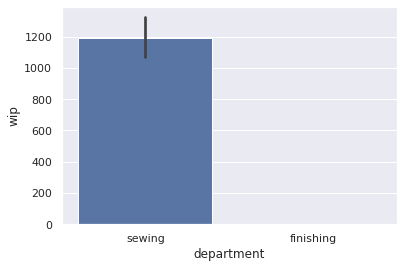

In [16]:
sns.barplot(x = 'department', y='wip', data = garments)

These missing values belongs to **finishing** department. The **finishing** department get a work from the **sewing** department. From this result we can assumed that the finishing department has no work in progress while waiting for work from the sewing department on that day. So we can replace the **Nan** with **0** using `fillna()`

In [17]:
garments['wip'] = garments['wip'].fillna(0)
garments.wip.isnull().sum()

0

Now, there is no NA in `wip` column. Let's just check the data again.

In [18]:
garments.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


### Explanatory Data Analysis

It's time to explore the data. L

Let's check the distribution of `actual_productivity`

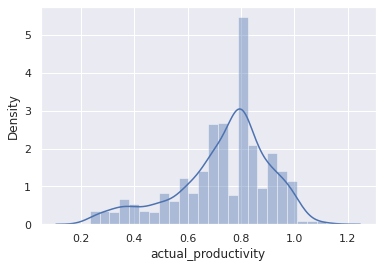

In [19]:
sns.distplot(garments['actual_productivity'])

From the histogram, the distribution of the `actual_productivity` is not normal.

#### Team's Performance

Let's check the performance for each team.

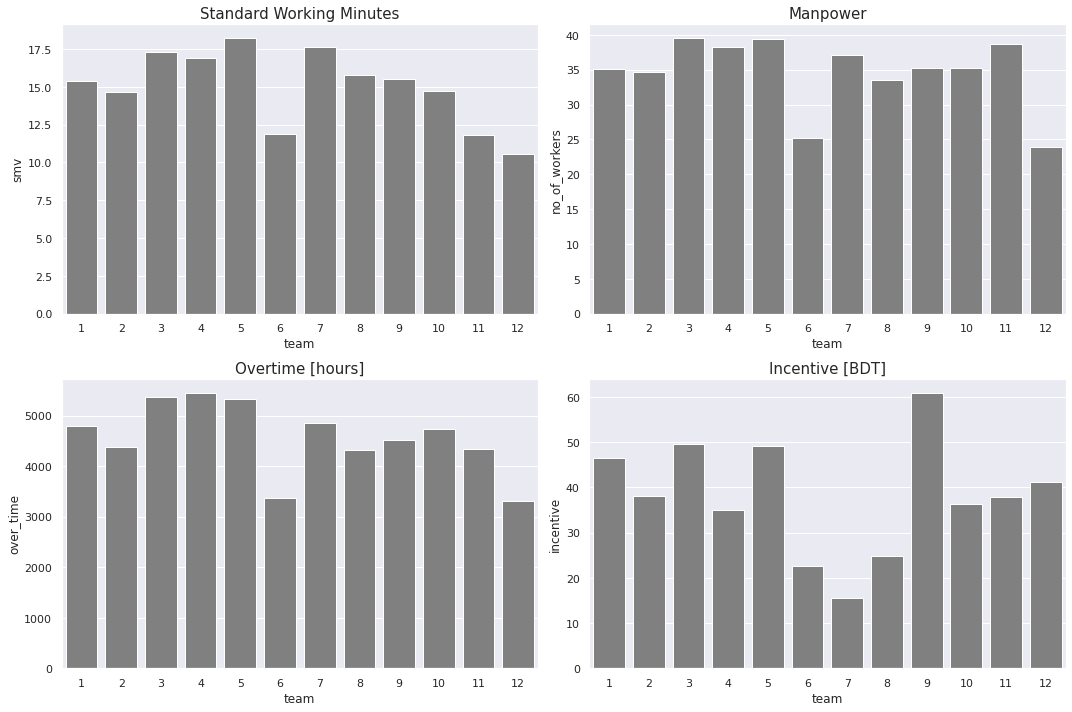

In [20]:
c = list(np.full(12, 'grey'))

f, ax = plt.subplots(2, 2, figsize=(15,10))

sns.barplot(data = garments, x='team', y = 'smv' , palette=c, ax = ax[0][0], ci = None)
ax[0][0].set_title('Standard Working Minutes', size= 15)
sns.barplot(data = garments, x='team', y='no_of_workers', palette=c, ax=ax[0][1], ci = None)
ax[0][1].set_title('Manpower', size = 15)
sns.barplot(data = garments, x='team', y='over_time', palette=c, ax=ax[1][0], ci = None)
ax[1][0].set_title('Overtime [hours]', size=15)
sns.barplot(data = garments, x='team', y='incentive', palette=c, ax=ax[1][1], ci = None)
ax[1][1].set_title('Incentive [BDT]', size=15)

plt.tight_layout()

#### Actual vs Targeted Productivity

Text(0.5, 1.0, 'Actual Productivity')

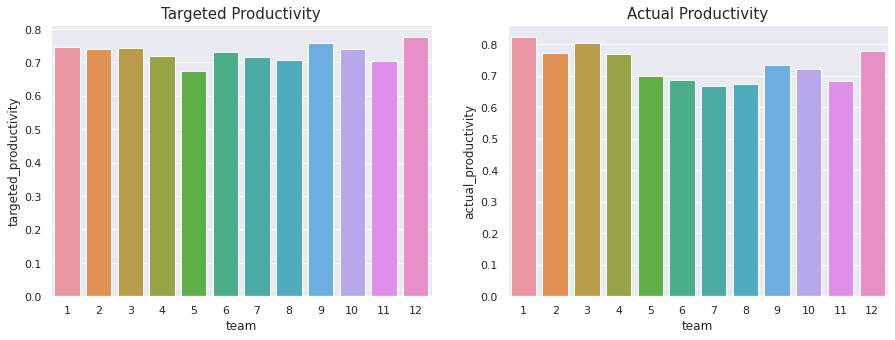

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

sns.barplot(data = garments, x = 'team', y = 'targeted_productivity', ax = ax1, ci = None)
ax1.set_title('Targeted Productivity', size = 15)
sns.barplot(data = garments, x = 'team', y = 'actual_productivity', ax = ax2, ci = None)
ax2.set_title('Actual Productivity', size = 15)

In [22]:
data = garments.copy()
data['gap'] = data['actual_productivity'] - data['targeted_productivity']
data_tmp = data.groupby('team').agg(gap = ('gap', 'sum'))
data_tmp['achieve'] = data.loc[:, 'gap'].apply(lambda x: 'Yes' if x >= 0 else 'No')
data_tmp

,gap,achieve
team,,
1,7.810710,Yes
2,3.373209,Yes
3,5.868583,Yes
4,5.503657,Yes
5,2.262214,Yes
6,-4.323788,Yes
7,-4.441471,Yes
8,-3.717856,Yes
9,-2.465961,Yes


From the table, we can see that the `actual_productivity` for team **1**, **2**, **3**, **4**, **5** and **12** fulfilled the `targeted_productivity`, while for team **6**, **7**, **8**, **9**, **10** and **11** didn't achive the `targeted_productivity`.

In [23]:
data = pd.pivot_table(data, index = ['team','department'], aggfunc = np.sum)
data['achieve'] = data.loc[:, 'gap'].apply(lambda x: 'Yes' if x >= 0 else 'No')
data = data.reset_index()
data[['team', 'department', 'achieve']]

,team,department,achieve
0,1,finishing,Yes
1,1,sewing,Yes
2,2,finishing,Yes
3,2,sewing,Yes
4,3,finishing,Yes
5,3,sewing,Yes
6,4,finishing,Yes
7,4,sewing,Yes
8,5,finishing,Yes
9,5,sewing,No


After the extensive exploring, the team's productivity by department shows different achievements for team **5** and **12**.

Let's look deeper for each `department` in `team`

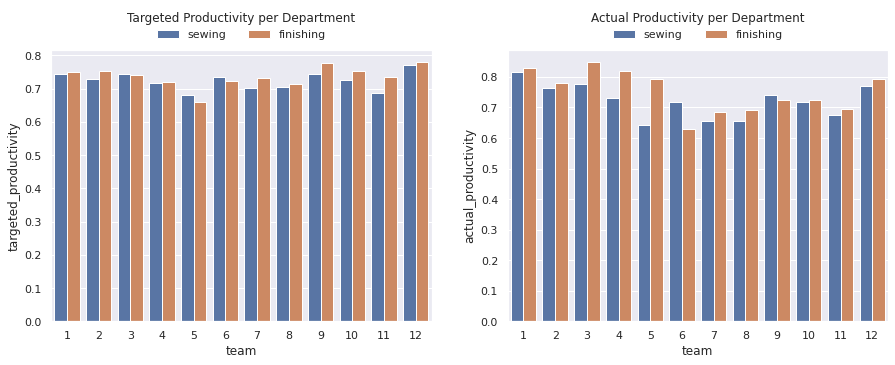

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.barplot(data = garments, x = 'team', y = 'targeted_productivity', hue = 'department', ax = ax1, ci = None)
sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1), title='Targeted Productivity per Department', ncol = 2, frameon = False)
sns.barplot(data = garments, x = 'team', y = 'actual_productivity', hue = 'department', ax = ax2, ci = None)
sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 1), title='Actual Productivity per Department', ncol = 2, frameon = False)

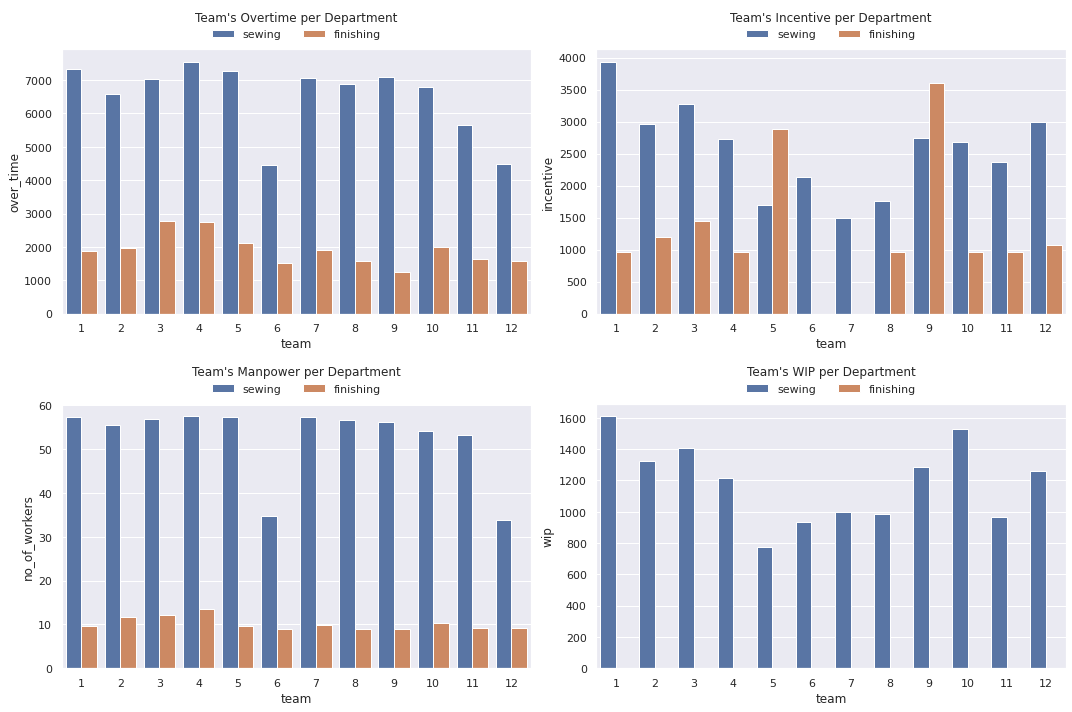

In [25]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,10))

sns.barplot(data = garments, x = 'team', y = 'over_time', hue = 'department', ax = ax1, ci = None)
sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1), title = "Team's Overtime per Department", ncol = 2, frameon = False)
sns.barplot(data = garments, x = 'team', y = 'incentive', hue = 'department', ax = ax2, estimator = np.sum, ci = None)
sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 1), title = "Team's Incentive per Department", ncol = 2, frameon = False)
sns.barplot(data = garments, x = 'team', y = 'no_of_workers', hue = 'department', ax = ax3, ci = None)
sns.move_legend(ax3, "lower center", bbox_to_anchor=(.5, 1), title = "Team's Manpower per Department", ncol = 2, frameon = False)
sns.barplot(data = garments, x = 'team', y = 'wip', hue = 'department', ax = ax4, ci = None)
sns.move_legend(ax4, "lower center", bbox_to_anchor=(.5, 1), title = "Team's WIP per Department", ncol = 2, frameon = False)

plt.tight_layout()

From the graphs, it can be concluded that there is significant difference beetween team's overtime and team's incentive based on team's achievements. **Finishing** in team **6** and **7**, they have a lot of overtime. However, they didn't get any `incentive`. And the `incentive` paid to the workers has different calculation between the `no_of_workers`. This should be company's attention.

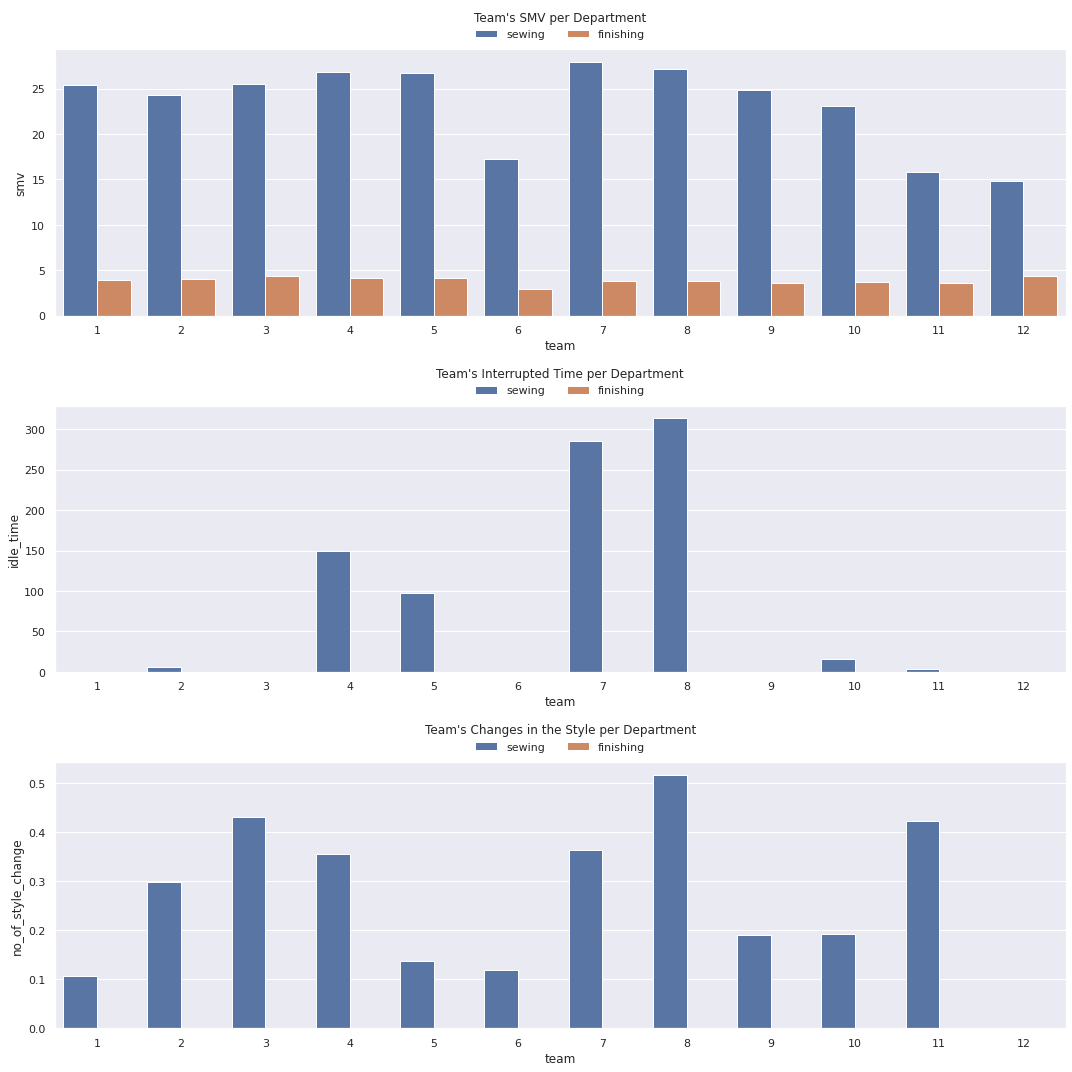

In [26]:
f, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, figsize = (15, 15))

sns.barplot(data = garments, x = 'team', y = 'smv', hue = 'department', ax = ax1, ci = None)
sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1), title = "Team's SMV per Department", ncol = 2, frameon = False)
sns.barplot(data = garments, x = 'team', y = 'idle_time', hue = 'department', ax = ax2, estimator = np.sum, ci = None)
sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 1), title = "Team's Interrupted Time per Department", ncol = 2, frameon = False)
sns.barplot(data = garments, x = 'team', y = 'no_of_style_change', hue = 'department', ax = ax3, ci = None)
sns.move_legend(ax3, "lower center", bbox_to_anchor=(.5, 1), title = "Team's Changes in the Style per Department", ncol = 2, frameon = False)

plt.tight_layout()

From the whole charts, the **finishing** `department` can be concluded that the whole process is depending on **sewing** since the **finishing** team works after they get **sewing**'s handover.

#### Variable's Correlation

Now, let's check the correlation between the variables.

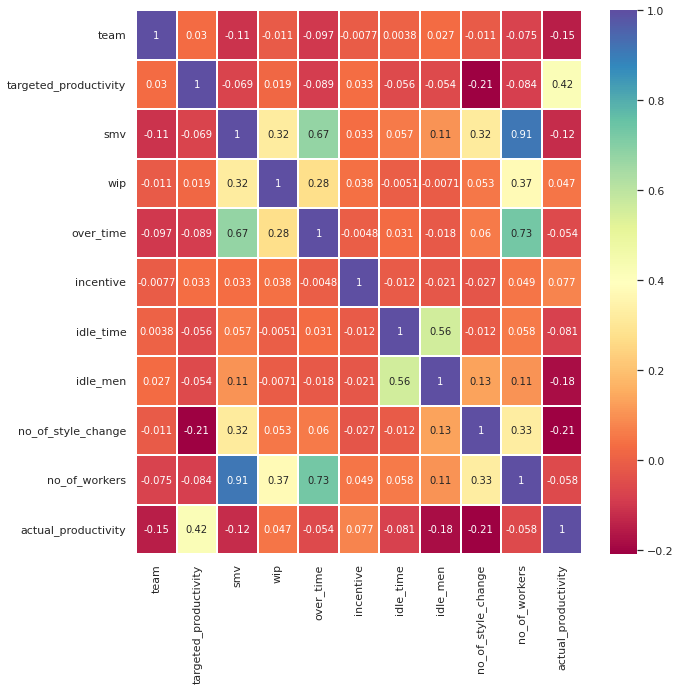

In [27]:
plt.figure(figsize = (10, 10))
sns.heatmap(garments.corr(), cmap = "Spectral", annot = True, linewidth = 1)

**Highest Positive Correlations**:


*   `no_of workers` and `smv` (**0.91**)
*   `no_of workers` and `over_time` (**0.73**)
*   `over_time` and `smv` (**0.67**)
*   `idle_men` and `idle_time` (**0.56**)


**Positive Correlations**:


*   `no_of workers` and `no_of_style_change` (**0.33**)
*   `no_of_style_change` and `smv` (**0.32**)

There is no obvious negative correlation between features

#### Define the Dataset

After doing the EDA, it's time to define the dataset. From the information, `date` is no longer needed. Let's remove `date`

In [28]:
garments = garments.drop(columns = 'date')
garments.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### Feature Engineering

#### Standardize Numerical Attributes

Now, let's scale the numeric value

In [29]:
from sklearn.preprocessing import StandardScaler
num_cols = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
scaler = StandardScaler()
garments[num_cols] = scaler.fit_transform(garments[num_cols])
garments[['day', 'team']] = garments[['day', 'team']].astype(str)
garments.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.719137,1.014552,0.277930,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229,1.178994
1,Quarter1,finishing,Thursday,1,0.208151,-1.016778,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,0.868096
2,Quarter1,sewing,Thursday,11,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,0.375423
3,Quarter1,sewing,Thursday,12,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,0.375423
4,Quarter1,sewing,Thursday,6,0.719137,0.990783,0.318882,-0.790895,0.073631,-0.057473,-0.113005,-0.351617,0.964023,0.374342


After scaling the numeric value, it's time to define the **X** and **y** value

In [30]:
y = garments['actual_productivity']
X = garments.drop(columns = ['actual_productivity','targeted_productivity'])
X.head()

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,Quarter1,sewing,Thursday,8,1.014552,0.277930,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229
1,Quarter1,finishing,Thursday,1,-1.016778,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268
2,Quarter1,sewing,Thursday,11,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225
3,Quarter1,sewing,Thursday,12,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225
4,Quarter1,sewing,Thursday,6,0.990783,0.318882,-0.790895,0.073631,-0.057473,-0.113005,-0.351617,0.964023


**y** is our **target** which is the `actual_productivity` while **X** is the **predictors** which are all other columns except `actual_productivity` and `targeted_productivity`. Because `targeted_productivity` is not a predictor since the numbers were already set by management.

#### One-Hot Encoding

In [31]:
# Get dummies
X = pd.get_dummies(X, prefix_sep='_')
X

,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_Quarter1,quarter_Quarter2,...,team_11,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9
0,1.014552,0.277930,0.750589,0.373414,-0.057473,-0.113005,-0.351617,1.099229,1,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.016778,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,1,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.333878,0.185457,-0.271092,0.073631,-0.057473,-0.113005,-0.351617,-0.185225,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0.990783,0.318882,-0.790895,0.073631,-0.057473,-0.113005,-0.351617,0.964023,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,-1.111853,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,0,1,...,0,0,0,0,0,0,0,0,0,0
1193,-1.020434,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,0,1,...,0,0,0,0,0,0,0,0,1,0
1194,-1.020434,-0.453931,-1.077682,-0.238643,-0.057473,-0.113005,-0.351617,-1.199268,0,1,...,0,0,0,0,0,0,0,1,0,0
1195,-1.111853,-0.453931,-0.826743,-0.238643,-0.057473,-0.113005,-0.351617,-0.883788,0,1,...,0,0,0,0,0,0,0,0,0,1


#### Split Train and Test Data

Now, let's split the **train** and **test** data with ratio of **80%** : **20%**.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# test set must not be touched

In [33]:
print('X shape\t\t:', X.shape)
print('y shape\t\t:', y.shape)
print()
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print()
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape		: (1197, 33)
y shape		: (1197,)

X_train shape: (957, 33)
y_train shape: (957,)

X_test shape	: (240, 33)
y_test shape	: (240,)


In [34]:
# Variable for storing result and plotting the Result
R2_square = []
mae_score = []
mse_score = []
names = []

### Model Development

After finishin the feature engineering, now it's time to develop some Regression Models.

#### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Plotting the Result
names.append("Linear Regression")
R2_square.append(metrics.r2_score(y_test, y_pred))
mse_score.append(mse)
mae_score.append(mae)

# Printing the metrics
print('Linear Regression:')
print('Suppport Vector Regression Accuracy: ', linear.score(X_test,y_test))
print('R2 square:', metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Linear Regression:
Suppport Vector Regression Accuracy:  -0.02237855969119318
R2 square: -0.02237855969119318
MAE:  0.7089097149989139
MSE:  0.8923781436105295


#### Ridge Regression

In [36]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

#Prediction using test set 
y_pred = ridge.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Plotting the Result
names.append("Ridge Regression")
R2_square.append(metrics.r2_score(y_test, y_pred))
mse_score.append(mse)
mae_score.append(mae)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', ridge.score(X_test,y_test))
print('R2 square:', metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  -0.018360401000118376
R2 square: -0.018360401000118376
MAE:  0.7077954875538875
MSE:  0.8888709133781616


#### Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

#Prediction using test set 
y_pred = lasso.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Plotting the Result
names.append("Lasso Regression")
R2_square.append(metrics.r2_score(y_test, y_pred))
mse_score.append(mse)
mae_score.append(mae)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', lasso.score(X_test,y_test))
print('R2 square:', metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  -0.006424658194793986
R2 square: -0.006424658194793986
MAE:  0.7304165920201356
MSE:  0.8784528584353376


#### Support Vector Regression (SVR)

In [38]:
from sklearn.svm import SVR

svr = SVR(kernel= 'rbf')
svr.fit(X_train, y_train)

#Prediction using test set 
y_pred = svr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Plotting the Result
names.append("Support Vector Regression")
R2_square.append(metrics.r2_score(y_test, y_pred))
mse_score.append(mse)
mae_score.append(mae)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', svr.score(X_test,y_test))
print('R2 square:', metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.32861797666587467
R2 square: 0.32861797666587467
MAE:  0.5205958363463931
MSE:  0.5860125273141024


#### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)

#Prediction using test set 
y_pred = dt_reg.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Plotting the Result
names.append("Decision Tree")
R2_square.append(metrics.r2_score(y_test, y_pred))
mse_score.append(mse)
mae_score.append(mae)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', dt_reg.score(X_test,y_test))
print('R2 square:', metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  -0.13942800671652988
R2 square: -0.13942800671652988
MAE:  0.6014277348481871
MSE:  0.9945441830457253


#### Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_reg = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_reg.fit(X_train, y_train)

#Prediction using test set 
y_pred = rf_reg.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Plotting the Result
names.append("Random Forest")
R2_square.append(metrics.r2_score(y_test, y_pred))
mse_score.append(mse)
mae_score.append(mae)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', rf_reg.score(X_test,y_test))
print('R2 square:', metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.43911451292158077
R2 square: 0.43911451292158077
MAE:  0.457891744995732
MSE:  0.4895661641107857


##### Hyperparameter Tuning

To optimize the R2 number in Random Forest, we can do Hyperparameter Tuning.

In [41]:
rfc = RandomForestRegressor()
parameters = {
    "n_estimators":[5,10,50,100,250,300,350,400,450,500],
    "max_depth":[2,4,8,16,32,64,None]
    
}

cv = GridSearchCV(rfc, parameters, cv = 5)
cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, 64, None],
                         'n_estimators': [5, 10, 50, 100, 250, 300, 350, 400,
                                          450, 500]})

In [42]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']

display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 300}




In [43]:
rf_reg2 = RandomForestRegressor(n_estimators = 300 ,  max_depth = 8, random_state = 0)
rf_reg2.fit(X_train,y_train)

y_pred = rf_reg2.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Plotting the Result
names.append("Random Forest Hyperparamater")
R2_square.append(metrics.r2_score(y_test, y_pred))
mse_score.append(mse)
mae_score.append(mae)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', rf_reg2.score(X_test,y_test))
print('R2 square:', metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.4589219386635477
R2 square: 0.4589219386635477
MAE:  0.45952174204521684
MSE:  0.4722773490766962


After doing a hyperparameter tuning, the result given is not showing a significant difference, from **44%** to **46%**.

#### Bagging Regressor

In [44]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

br_reg = BaggingRegressor(n_estimators = 400, random_state = 0)
br_reg.fit(X_train, y_train)

#Prediction using test set 
y_pred = br_reg.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Plotting the Result
names.append("Bagging Regressor")
R2_square.append(metrics.r2_score(y_test, y_pred))
mse_score.append(mse)
mae_score.append(mae)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', br_reg.score(X_test,y_test))
print('R2 square:', metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.44460806073336656
R2 square: 0.44460806073336656
MAE:  0.45591187270375666
MSE:  0.48477114767421464


#### Gradien Boosting Regressor

In [45]:
gbr_reg = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.1, loss = 'squared_error', random_state = 0)
gbr_reg.fit(X_train, y_train)

#Prediction using test set 
y_pred = gbr_reg.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Plotting the Result
names.append("Gradient Boosting")
R2_square.append(metrics.r2_score(y_test, y_pred))
mse_score.append(mse)
mae_score.append(mae)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', gbr_reg.score(X_test,y_test))
print('R2 square:', metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.364647182989822
R2 square: 0.364647182989822
MAE:  0.5015378810027578
MSE:  0.5545646101503894


#### XG Boost Regression

In [46]:
import xgboost

xgb_reg = xgboost.XGBRegressor(verbosity = 0)
xgb_reg.fit(X_train, y_train)

XGBRegressor(verbosity=0)

In [47]:
score = xgb_reg.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.6394428939987488


In [48]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

scores = cross_val_score(xgb_reg, X_train, y_train, cv = 10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.49


In [49]:
y_pred = xgb_reg.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Plotting the Result
names.append("XG Boost")
R2_square.append(metrics.r2_score(y_test, y_pred))
mse_score.append(mse)
mae_score.append(mae)

# Printing the metrics
print('Suppport Vector Regression Accuracy: ', xgb_reg.score(X_test,y_test))
print('R2 square:', metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  0.42732109214339775
R2 square: 0.42732109214339775
MAE:  0.4939625704091629
MSE:  0.4998599939657776


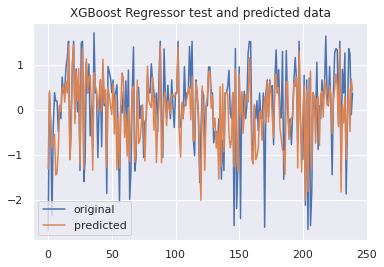

In [50]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label = "original")
plt.plot(x_ax, y_pred, label = "predicted")
plt.title("XGBoost Regressor test and predicted data")
plt.legend()
plt.show()

#### Result Plot

Before creating value's dataframe, let's check the type of the dictionaries.

In [51]:
print(type(names))
print(type(R2_square))
print(type(mae_score))
print(type(mse_score))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [52]:
pd.DataFrame(list(zip(names, R2_square, mae_score, mse_score)),
             columns =['Regression Type', 'R Square', 'MAE Score', 'MSE Score'])

,Regression Type,R Square,MAE Score,MSE Score
0,Linear Regression,-0.022379,0.708910,0.892378
1,Ridge Regression,-0.018360,0.707795,0.888871
2,Lasso Regression,-0.006425,0.730417,0.878453
3,Support Vector Regression,0.328618,0.520596,0.586013
4,Decision Tree,-0.139428,0.601428,0.994544
5,Random Forest,0.439115,0.457892,0.489566
6,Random Forest Hyperparamater,0.458922,0.459522,0.472277
7,Bagging Regressor,0.444608,0.455912,0.484771
8,Gradient Boosting,0.364647,0.501538,0.554565
9,XG Boost,0.427321,0.493963,0.499860


#### Conclusion

From the result, it can be concluded that **Random Forest** with **Hyperparameter** tuning gives the best result for **Regression**,. Howeve, **Bagging Regression** also giving the best result comparing to **Random Forest** withouht **Hyperparameter Tuning**. So, the best is to use **Random Forest** with **Hyperparameter Tuning**.

From the EDA, management really needs to review:

*   `over_time`: the **overtime** number was higher, especially for **sewing** department
*   `incentive`: from the chart, the **incentive** value wasn't distributed fairly. There were 2 teams who has higher overtime rate but didn't get the incentive.
*   `wip`: from the graph, **wip** value for **finishing** were missing. Management should concern about this and reinput the missing values, or check why there were no wip for **finishing**.




